In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft #stft
from scipy.signal import butter, sosfiltfilt #signal filtering 
from scipy.interpolate import interp1d
import numpy as npy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [64]:
#first test example from "MuseCrocMobile" Paper
#file_path = "MuseCrocMobile_Analysis/2025-08-16_15_12_26_Muse_Recording.csv"

#while programming - moving around at desk 
#file_path = "MuseCrocMobile_2025-10-08_21_57_05_MS_03PRESET_1032_EEG@256Hz_Accelerometer@52Hz_Gyroscope@52Hz_DRL_REF@32Hz_Optics@64Hz_.csv"

#eyes open, staring at monitor 
file_path = "MuseCrocMobile_2025-10-08_21_12_24_MS_03PRESET_1032_EEG@256Hz_Accelerometer@52Hz_Gyroscope@52Hz_DRL_REF@32Hz_Optics@64Hz_.csv"

#change to your file path
df = pd.read_csv(file_path)
df.head()

for col_name in df.columns:
    print(col_name)

print(df.shape)

#Setting font size to 25 for all graphs
plt.rcParams.update({'font.size': 25})

PACKET_TYPE
CLOCK_TIME
ms_ELAPSED
TP9_CONNECTION_STRENGTH(HSI)
TP9_ARTIFACT_FREE(IS_GOOD)
AF7_CONNECTION_STRENGTH(HSI)
AF7_ARTIFACT_FREE(IS_GOOD)
AF8_CONNECTION_STRENGTH(HSI)
AF8_ARTIFACT_FREE(IS_GOOD)
TP10_CONNECTION_STRENGTH(HSI)
TP10_ARTIFACT_FREE(IS_GOOD)
TP9_RAW
AF7_RAW
AF8_RAW
TP10_RAW
DRL
REF
TP9_DELTA_ABSOLUTE
AF7_DELTA_ABSOLUTE
AF8_DELTA_ABSOLUTE
TP10_DELTA_ABSOLUTE
TP9_THETA_ABSOLUTE
AF7_THETA_ABSOLUTE
AF8_THETA_ABSOLUTE
TP10_THETA_ABSOLUTE
TP9_ALPHA_ABSOLUTE
AF7_ALPHA_ABSOLUTE
AF8_ALPHA_ABSOLUTE
TP10_ALPHA_ABSOLUTE
TP9_BETA_ABSOLUTE
AF7_BETA_ABSOLUTE
AF8_BETA_ABSOLUTE
TP10_BETA_ABSOLUTE
TP9_GAMMA_ABSOLUTE
AF7_GAMMA_ABSOLUTE
AF8_GAMMA_ABSOLUTE
TP10_GAMMA_ABSOLUTE
TP9_DELTA_RELATIVE
AF7_DELTA_RELATIVE
AF8_DELTA_RELATIVE
TP10_DELTA_RELATIVE
TP9_THETA_RELATIVE
AF7_THETA_RELATIVE
AF8_THETA_RELATIVE
TP10_THETA_RELATIVE
TP9_ALPHA_RELATIVE
AF7_ALPHA_RELATIVE
AF8_ALPHA_RELATIVE
TP10_ALPHA_RELATIVE
TP9_BETA_RELATIVE
AF7_BETA_RELATIVE
AF8_BETA_RELATIVE
TP10_BETA_RELATIVE
TP9_GAMMA_RELA

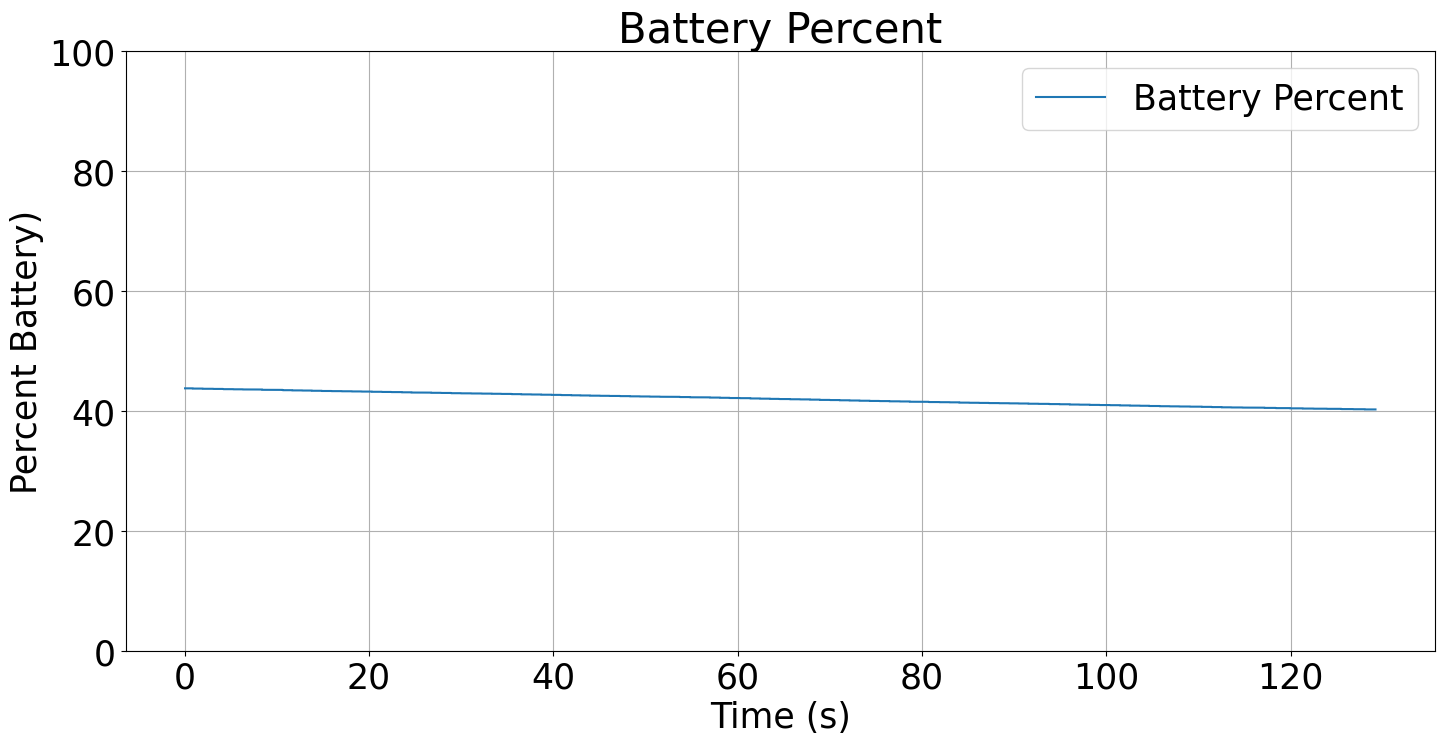

In [ ]:
'''
Battery issues can cause the Muse to malfunction - check that!
'''

time_sec = df["ms_ELAPSED"] / 1000.0

plt.figure(figsize=(15, 8))
plt.plot(time_sec, df['BATTERY_PERCENT'], label="Battery Percent")

plt.ylim(0,100)

plt.xlabel("Time (s)")
plt.ylabel("Percent Battery)")
plt.title(f"Battery Percent")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_8045/3952283556.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


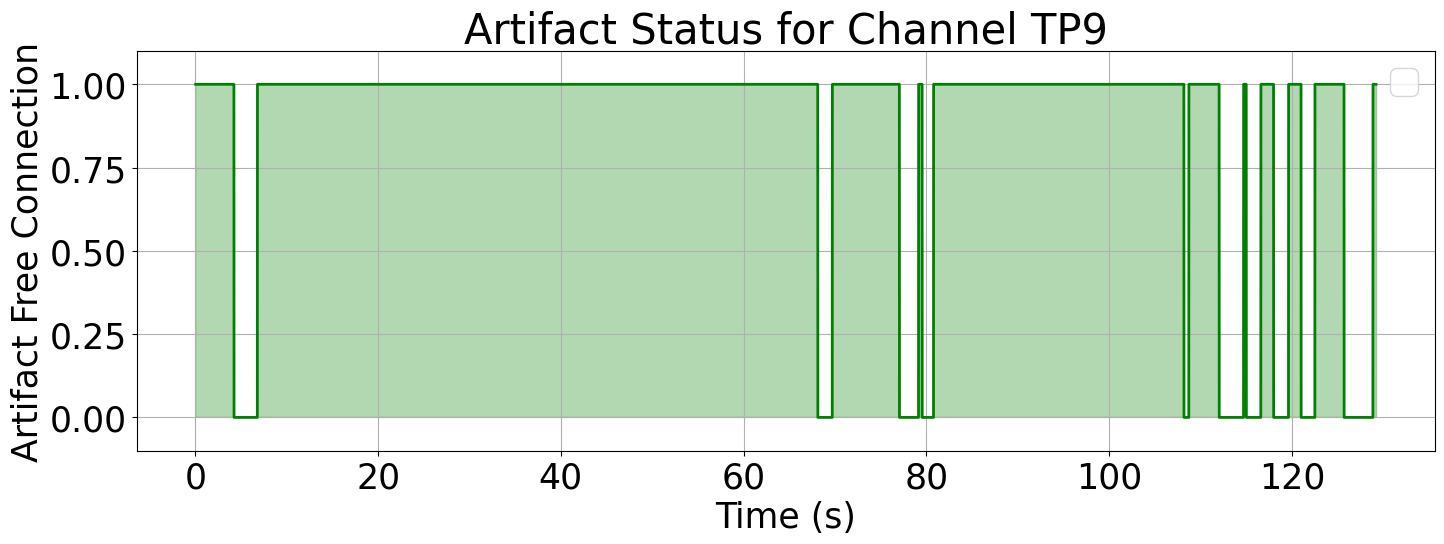

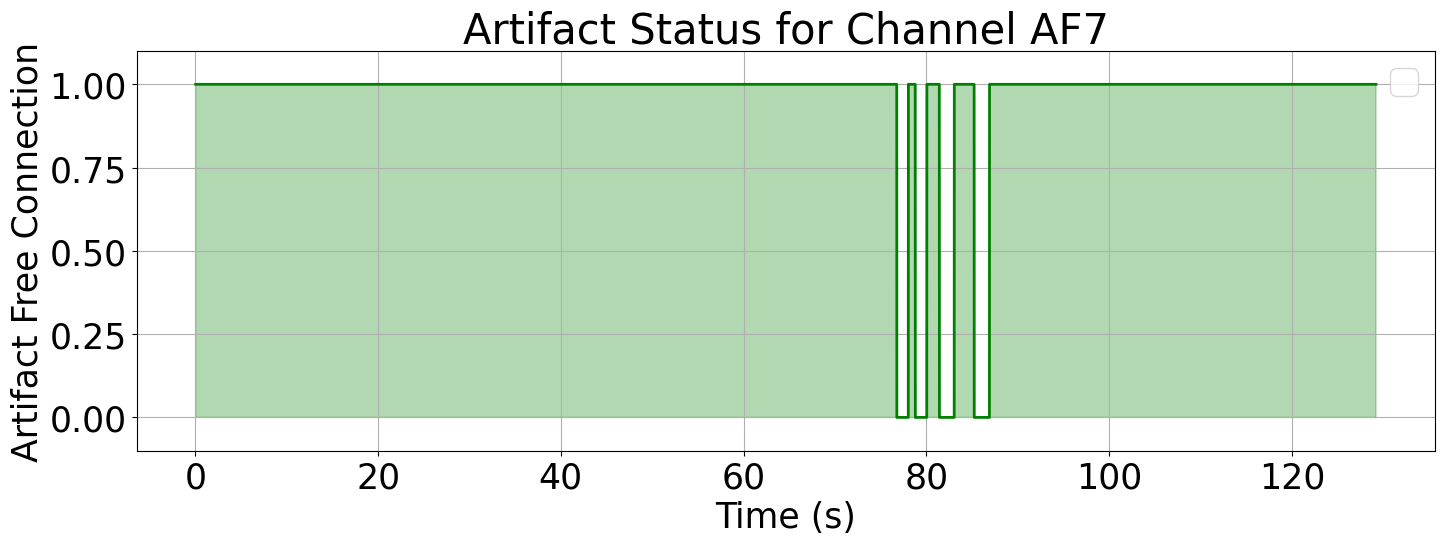

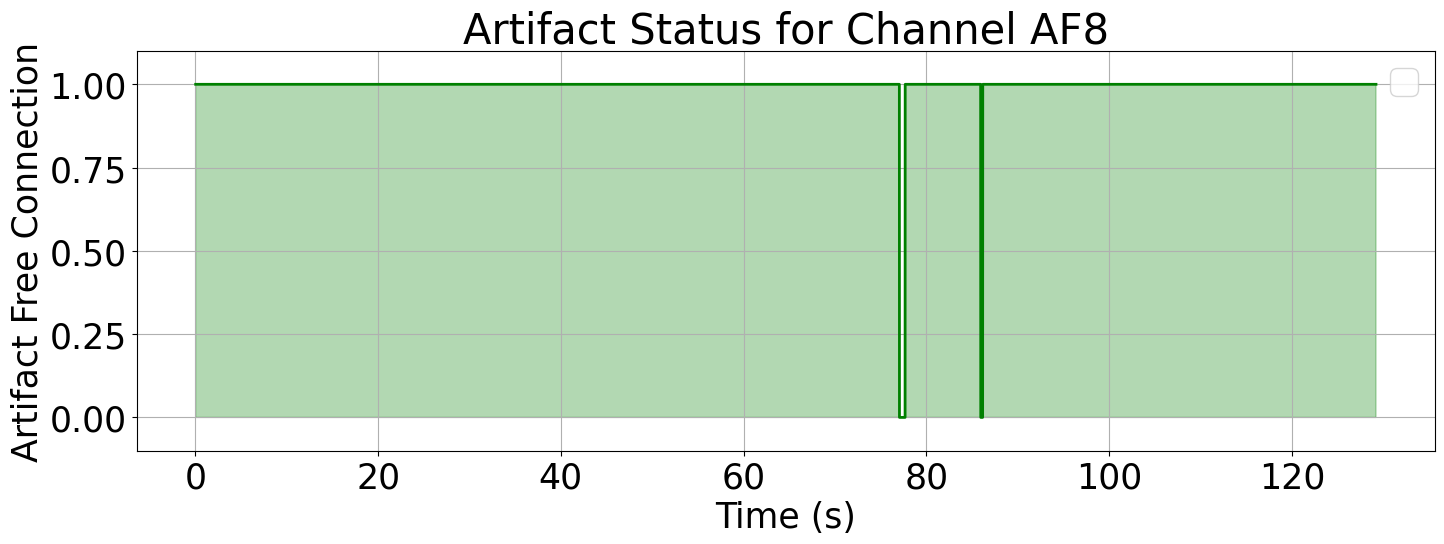

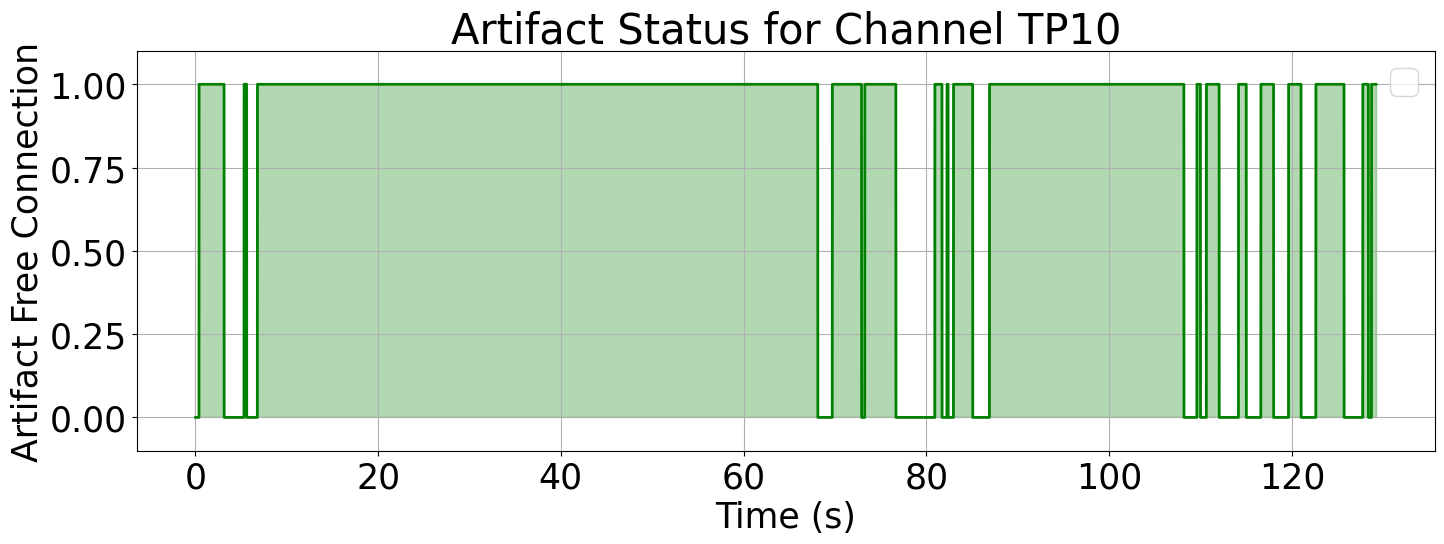

In [65]:
#Artifact Detection Code

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]

for ch in channels:
    artifact_col = ch + "_ARTIFACT_FREE(IS_GOOD)"

    plt.figure(figsize=(15, 6))

    plt.plot(time_sec, df[artifact_col], linewidth=2, color='green')
    plt.fill_between(time_sec, 0, df[artifact_col], where=(df[artifact_col] >0), color='green', alpha=0.3)

    plt.xlabel("Time (s)")
    plt.ylabel("Artifact Free Connection")
    plt.title(f"Artifact Status for Channel {ch}")

    plt.grid(True)
    plt.legend()
    plt.ylim(-0.1, 1.1)
    #plt.xlim(0,30)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_8045/1559566416.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


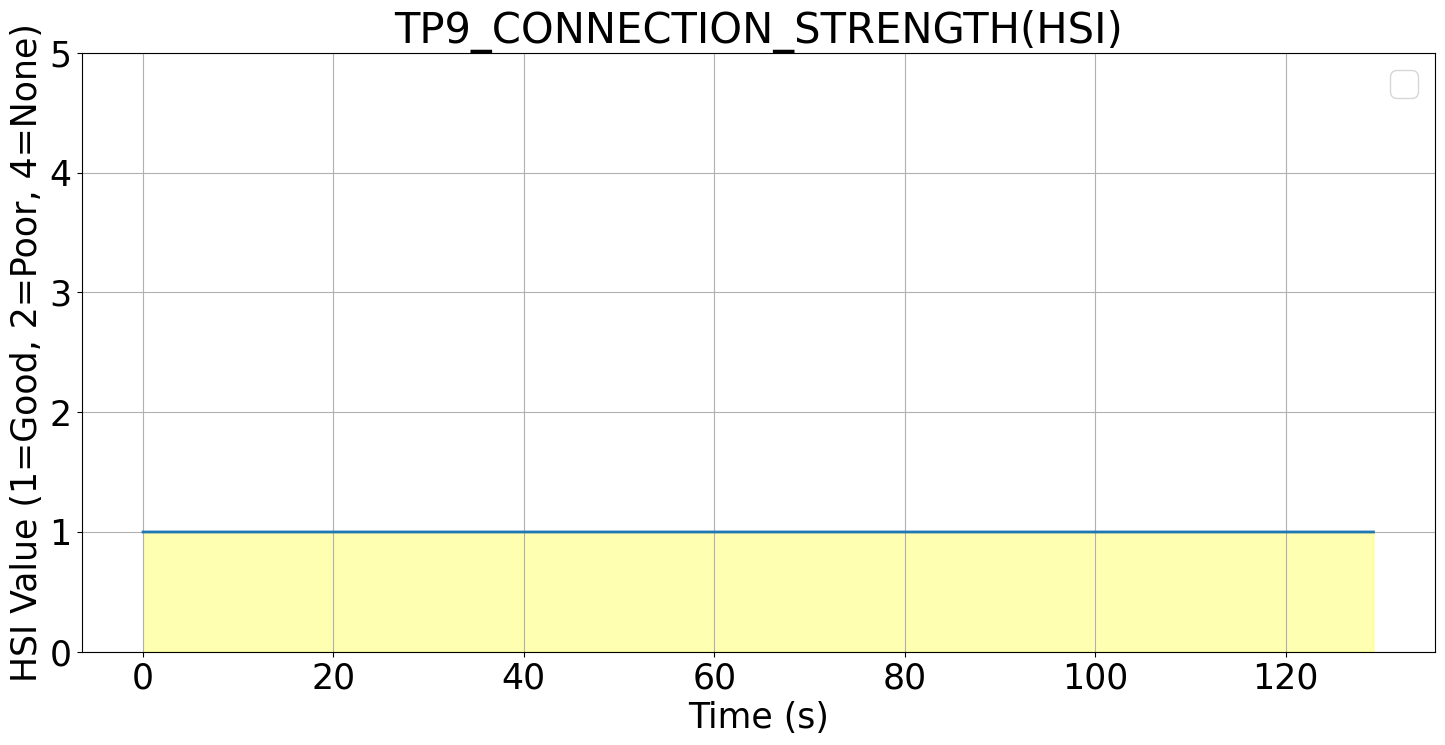

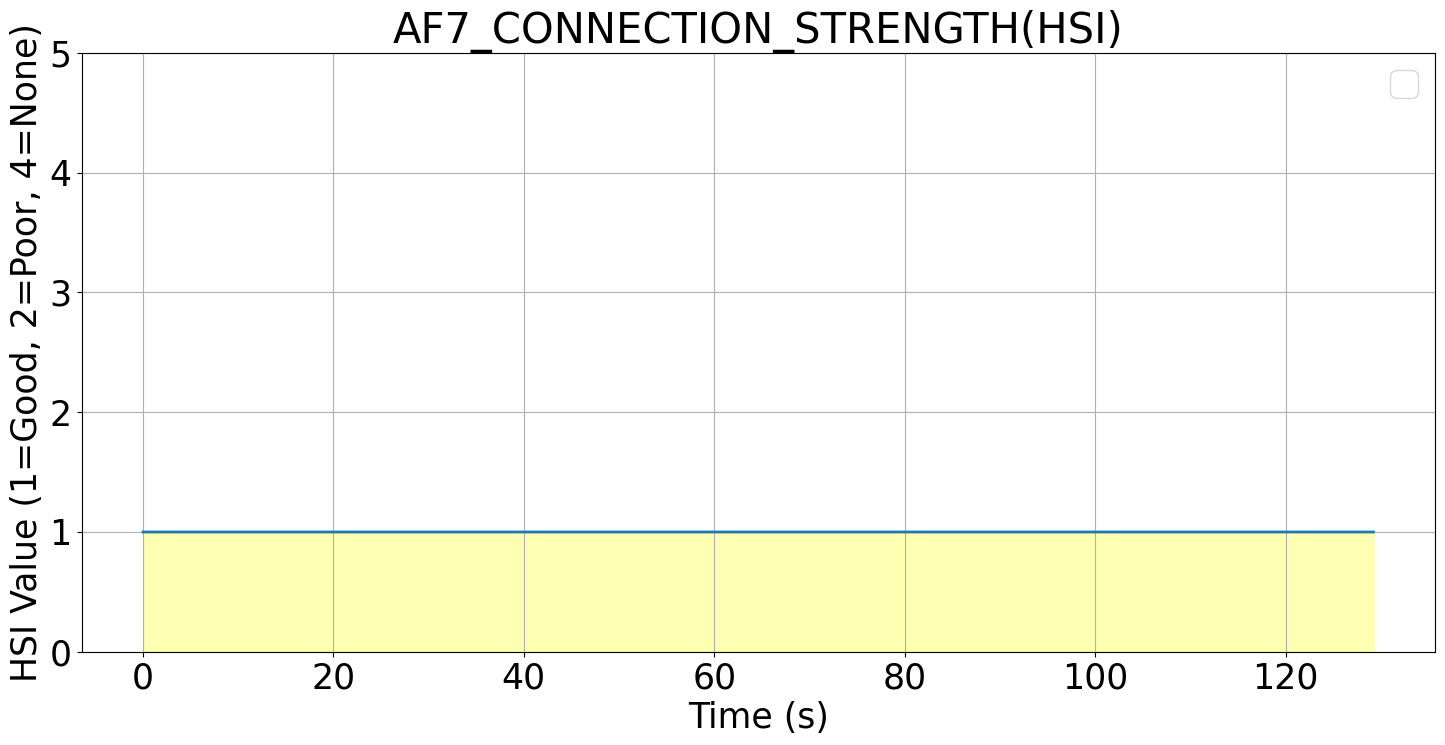

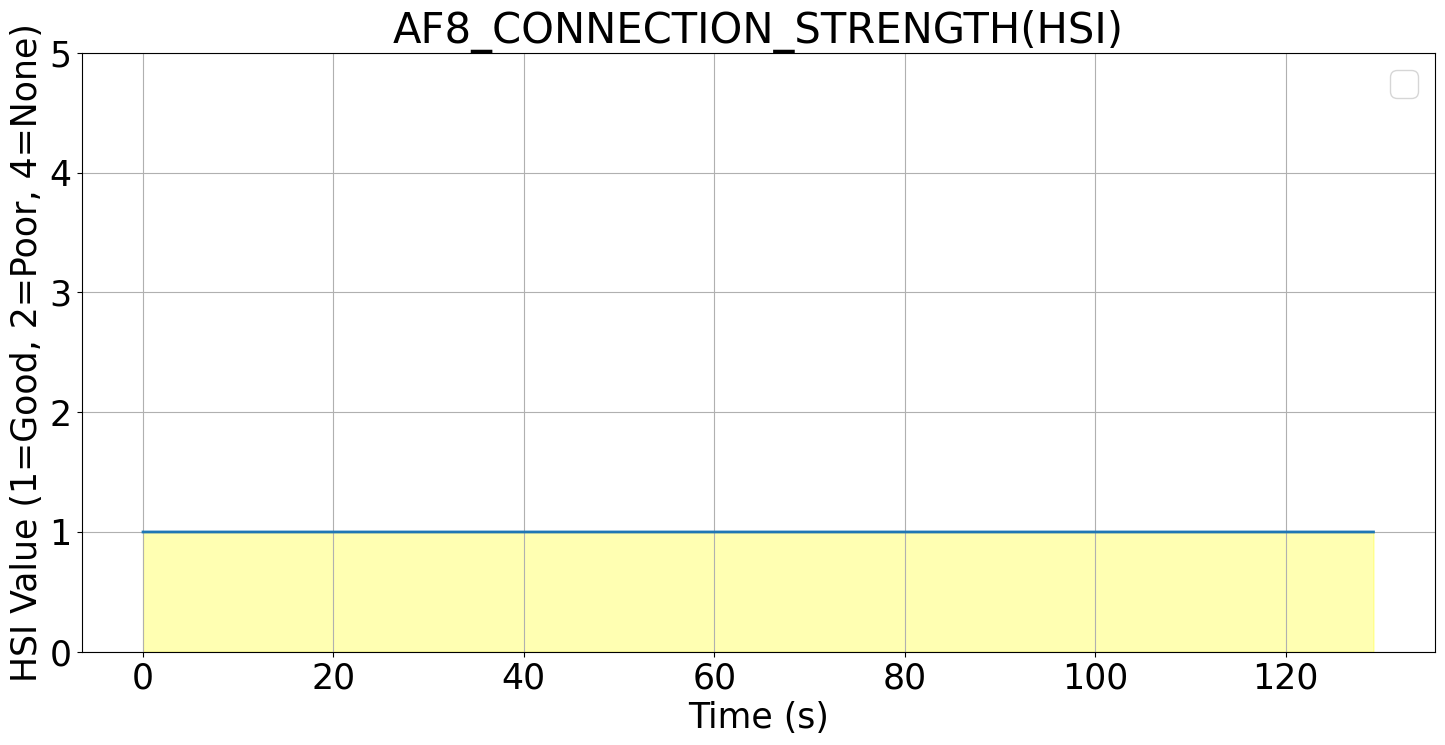

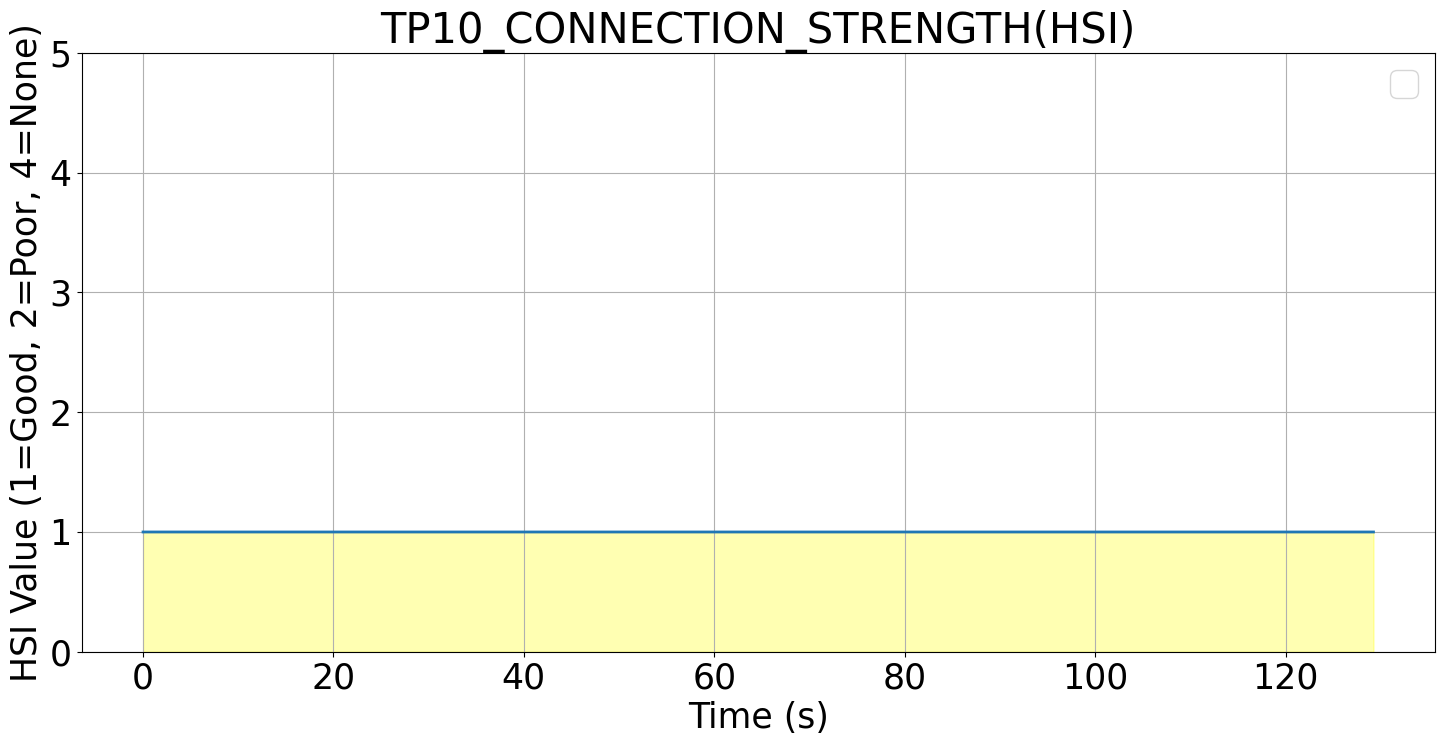

In [66]:
time_sec = df["ms_ELAPSED"] / 1000.0
hsi_channels = ["TP9_CONNECTION_STRENGTH(HSI)","AF7_CONNECTION_STRENGTH(HSI)","AF8_CONNECTION_STRENGTH(HSI)","TP10_CONNECTION_STRENGTH(HSI)"]

for hsi_ch in hsi_channels:

    plt.figure(figsize=(15, 8))

    #plottign the channel's values
    #plt.plot(time_sec, df[hsi_ch],label=hsi_ch, linewidth=2)
    plt.plot(time_sec, df[hsi_ch], linewidth=2)

    plt.xlabel("Time (s)")
    plt.ylabel("HSI Value (1=Good, 2=Poor, 4=None)")
    plt.title(hsi_ch)

    plt.fill_between(time_sec, 0, df[hsi_ch], where=(df[hsi_ch] >0), color='yellow', alpha=0.3)

    plt.ylim(0, 5) #setting graph to display values between 0-5

    #Labeling the different HSI values 
    #plt.yticks([1, 2, 4], ['Good Connection','Poor Connection', 'No/Horrible Connection'])

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

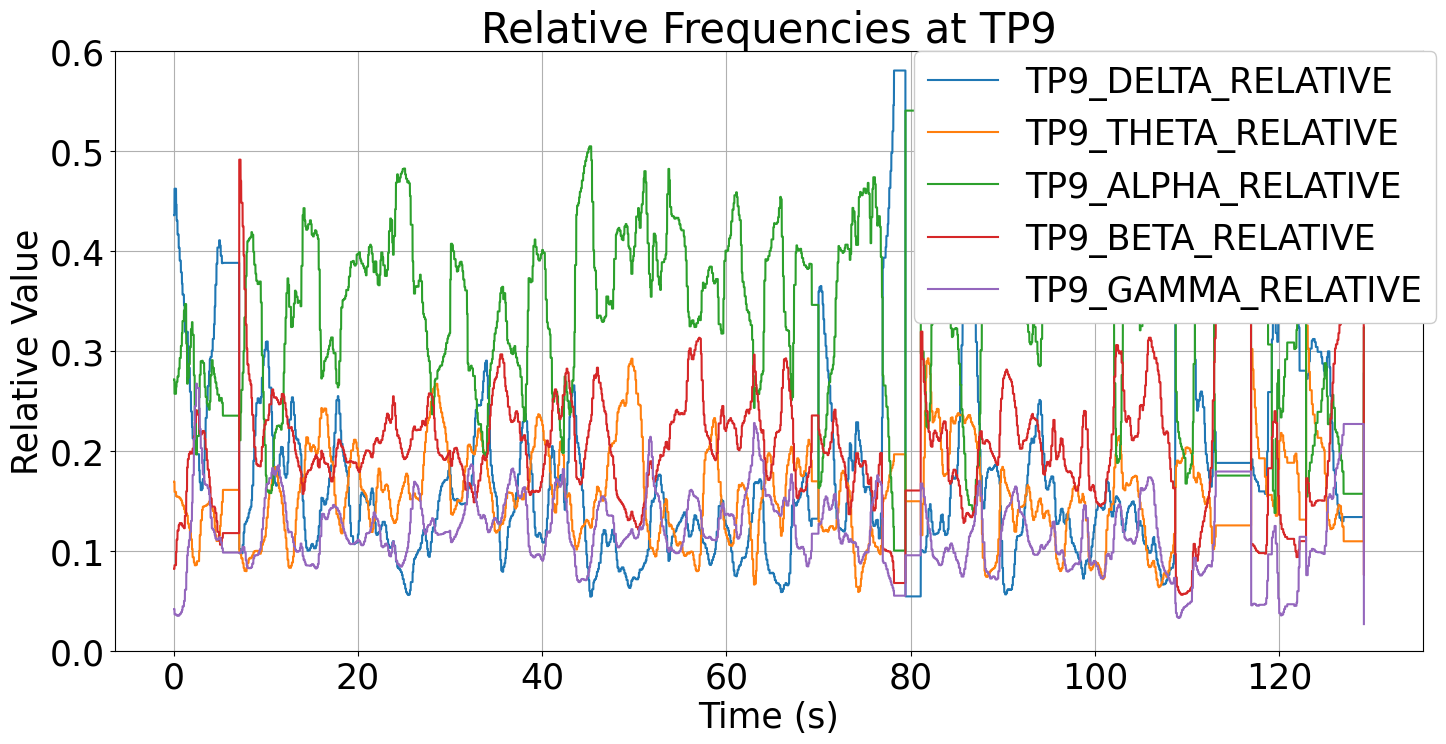

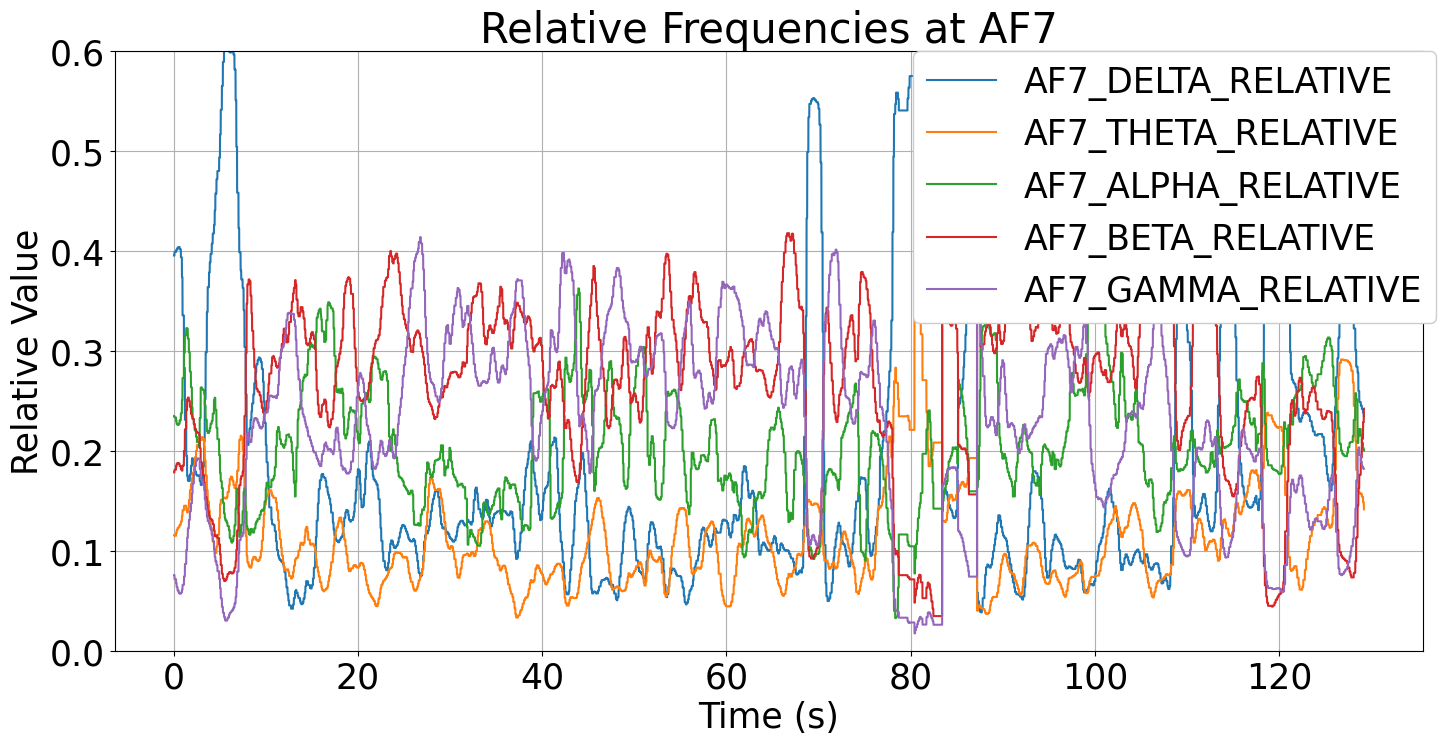

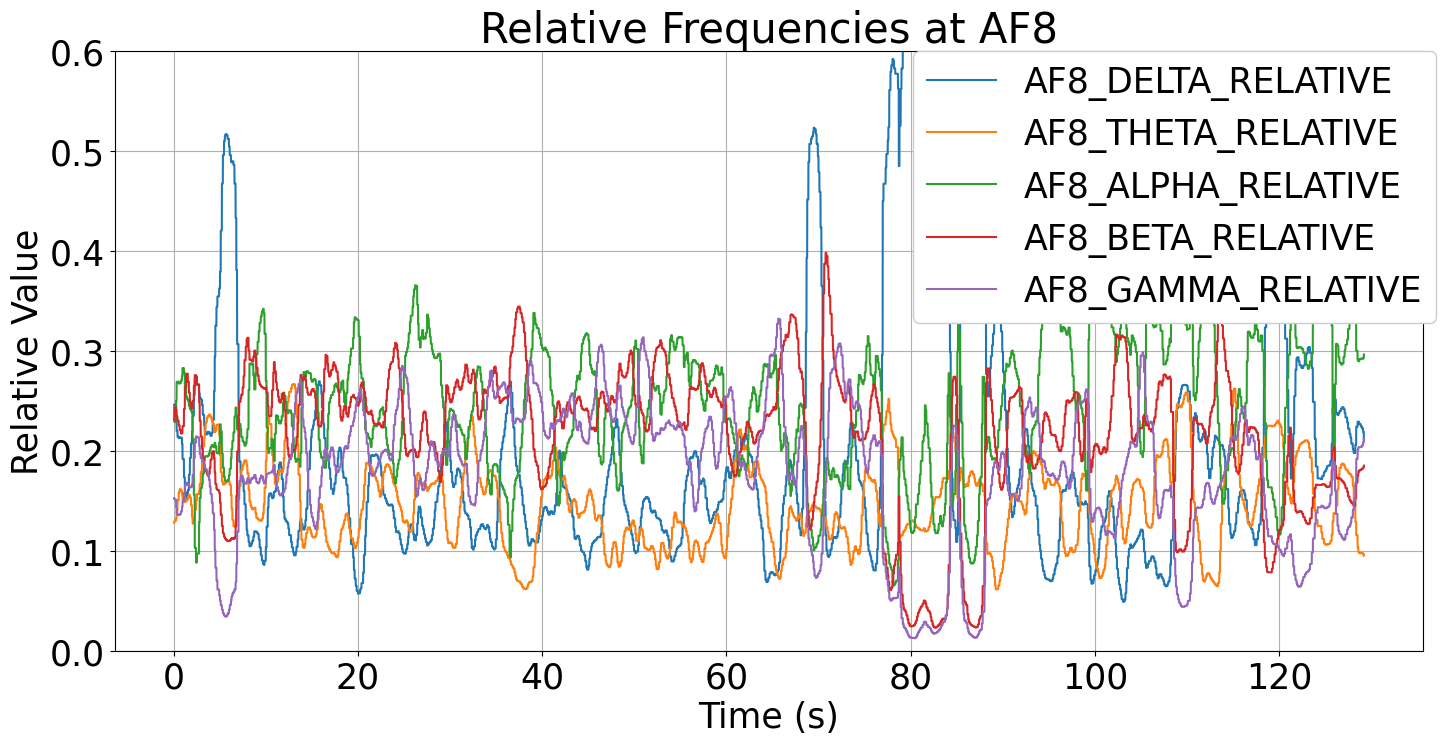

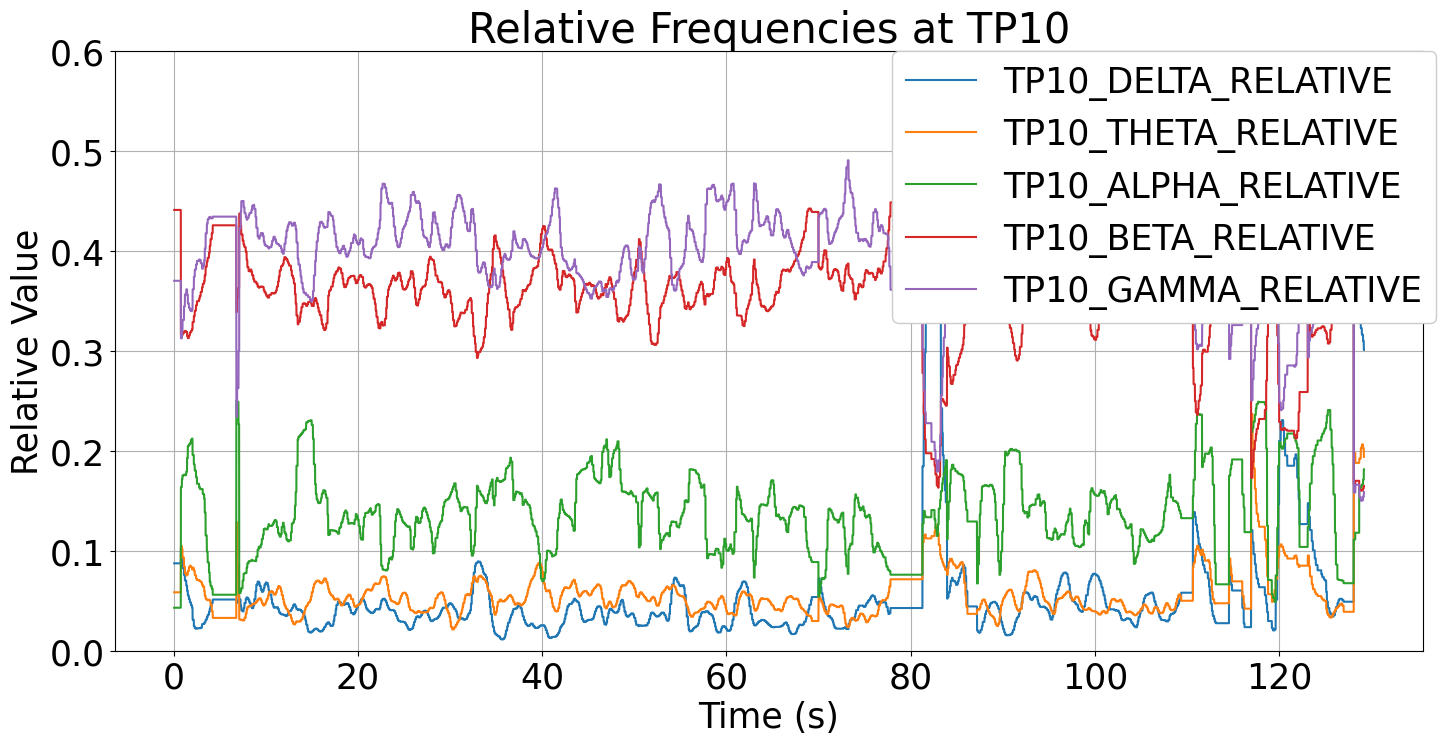

In [68]:
#This code graphs relative freqs over time

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]
waves = ["_DELTA", "_THETA", "_ALPHA", "_BETA", "_GAMMA"]

for ch in channels:

    plt.figure(figsize=(15, 8))

    for w in waves:
        
        d = ch + w + "_RELATIVE"
        
        plt.plot(time_sec, df[d], label=d)
        #plt.plot(time_sec, df[d])
    
    plt.xlabel("Time (s)")
    plt.ylabel("Relative Value")

    plt.title(f"Relative Frequencies at " + ch)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.01,1) , loc='upper right', borderaxespad=0. , framealpha=1)
    #plt.xlim(0,30) 
    plt.ylim(0, 0.6)
    plt.tight_layout()
    plt.show()


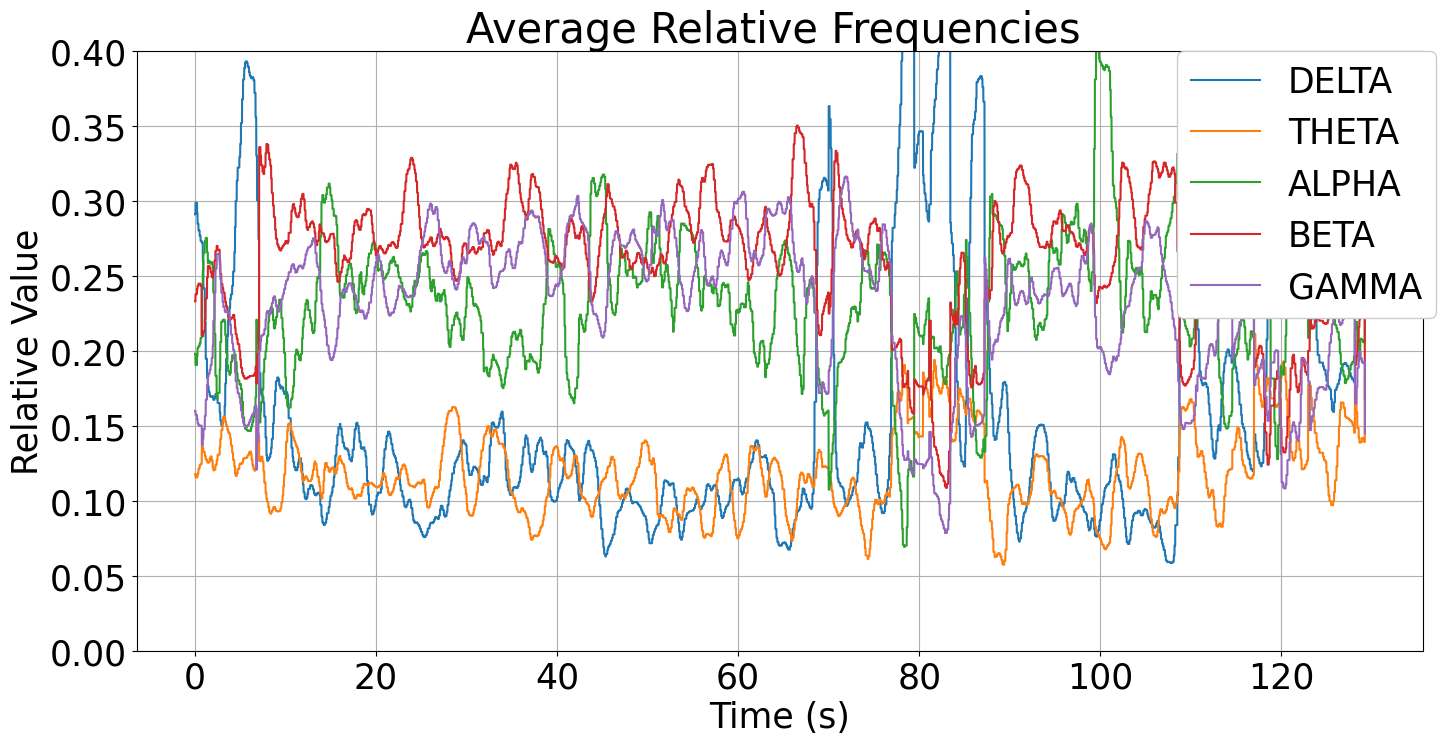

In [69]:
#Avg Relative Frequencies

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]
waves = ["DELTA", "THETA", "ALPHA", "BETA", "GAMMA"]

plt.figure(figsize=(15, 8))

plt.xlabel("Time (s)")
plt.ylabel("Relative Value")
plt.title("Average Relative Frequencies ")

for w in waves:
    #collecting channel values for a wave
    waveChannels = []
    for ch in channels:
        waveChannels.append( ch + "_" + w + "_RELATIVE" )

    #take mean values of each waveChannel 
    wave_mean = df[waveChannels].mean(axis=1).values
    
    plt.plot(time_sec, wave_mean, label=(w))
    #plt.plot(time_sec, wave_mean)
        
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01,1) , loc='upper right', borderaxespad=0. , framealpha=1)
#plt.xlim(0,30)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.show()